In [ ]:
import matplotlib.pyplot as plt
import einops 

def imshow(img, figsize=None):
    if len(img.shape) == 4:
        img = img.squeeze()
    if img.shape[0] == 3:
        img = einops.rearrange(img, "c h w -> h w c")
    plt.figure(figsize=figsize)
    plt.imshow(img)
    


In [ ]:
import torchvision 
import torch
import torch.nn as nn
# remember to model.eval()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
class PixelImage(nn.Module):
    def __init__(self):
        super(PixelImage, self).__init__()
        self.image_tensor = nn.Parameter(torch.randn(1, 3, 224, 224, device=device))
    
    def forward(self):
        result = torch.clip(self.image_tensor, 0, 1)
        return result

In [560]:
transforms = nn.Sequential(
    torchvision.transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    torchvision.transforms.RandomAffine(
        degrees=10, translate=(0.05, 0.05), shear=10
    ),
)

In [ ]:
def optimize_img(img_module, num_iters=100, apply_transforms=False, lr=0.1):
    model = torchvision.models.resnet34(pretrained=True).to(device)
    optimizer = torch.optim.Adam(img_module.parameters(), lr=lr) 
    model.eval()
    for i in range(num_iters):
        optimizer.zero_grad()
        img = img_module()
        if apply_transforms:
            img = transforms(img)
        out = model(img)
        loss = -out[0, 50]
        loss.backward()
        if i % (num_iters // 10) == 0:
            print("Iteration", i, "- logit", out[0,50].item())
        optimizer.step()
    with torch.no_grad():
        im = img_module()
        imshow(im.to("cpu"))
        return im
    

Iteration 0 - logit 0.8768835663795471
Iteration 10 - logit 69.4835205078125
Iteration 20 - logit 102.75704193115234
Iteration 30 - logit 122.10599517822266
Iteration 40 - logit 132.63853454589844
Iteration 50 - logit 144.11920166015625
Iteration 60 - logit 151.73866271972656
Iteration 70 - logit 156.7297821044922
Iteration 80 - logit 160.6487579345703
Iteration 90 - logit 164.40773010253906


tensor([[[[0.4706, 0.6989, 0.7505,  ..., 0.9432, 0.7554, 0.6359],
          [0.5001, 0.2495, 0.3864,  ..., 0.0103, 0.4788, 0.7884],
          [0.0610, 0.3644, 0.2645,  ..., 0.3599, 0.9709, 0.9443],
          ...,
          [0.5497, 0.7424, 0.0812,  ..., 0.9678, 0.9004, 0.4908],
          [0.7341, 0.7905, 0.8316,  ..., 0.9433, 0.9443, 0.9579],
          [0.9349, 0.7823, 0.9678,  ..., 0.9339, 0.9468, 0.9243]],

         [[0.8173, 0.7120, 0.8388,  ..., 0.9382, 0.7211, 0.8301],
          [0.7216, 0.3280, 0.5348,  ..., 0.1771, 0.8664, 0.3283],
          [0.4787, 0.6127, 0.3465,  ..., 0.8651, 0.9664, 0.9758],
          ...,
          [0.4274, 0.8823, 0.1409,  ..., 0.0833, 0.5186, 0.7126],
          [0.3725, 0.3064, 0.2113,  ..., 0.2881, 0.4037, 0.9220],
          [0.9330, 0.2123, 0.3867,  ..., 0.7483, 0.6898, 0.5432]],

         [[0.9148, 0.8798, 0.9338,  ..., 0.8357, 0.2496, 0.2441],
          [0.8185, 0.8663, 0.8331,  ..., 0.0882, 0.1367, 0.3674],
          [0.8605, 0.4353, 0.9181,  ..., 0

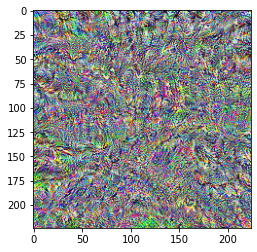

In [ ]:
class SigmoidImage(nn.Module):
    def __init__(self):
        super(SigmoidImage, self).__init__()
        self.image_tensor = nn.Parameter(torch.randn(1, 3, 224, 224, device=device))
    
    def forward(self):
        result = torch.sigmoid(self.image_tensor)
        return result
    
optimize_img(SigmoidImage())

Iteration 0 - logit -0.41702666878700256
Iteration 30 - logit 19.168729782104492
Iteration 60 - logit 27.3925724029541
Iteration 90 - logit 38.231178283691406
Iteration 120 - logit 48.41627883911133
Iteration 150 - logit 54.52402114868164
Iteration 180 - logit 45.900367736816406
Iteration 210 - logit 59.8571891784668
Iteration 240 - logit 60.18918991088867
Iteration 270 - logit 73.37911224365234


tensor([[[[0.8972, 0.2787, 0.3094,  ..., 0.2563, 0.5216, 0.2524],
          [0.6475, 0.6610, 0.3608,  ..., 0.3632, 0.1961, 0.1501],
          [0.3260, 0.3232, 0.6462,  ..., 0.1629, 0.0789, 0.4540],
          ...,
          [0.0620, 0.2030, 0.5300,  ..., 0.2214, 0.4563, 0.5583],
          [0.4785, 0.4417, 0.3322,  ..., 0.6826, 0.1157, 0.2812],
          [0.5513, 0.7793, 0.1152,  ..., 0.4658, 0.1530, 0.2565]],

         [[0.6381, 0.1497, 0.6958,  ..., 0.2576, 0.3414, 0.7448],
          [0.1984, 0.5773, 0.2252,  ..., 0.4245, 0.3306, 0.2056],
          [0.2134, 0.9675, 0.4478,  ..., 0.5820, 0.4444, 0.1726],
          ...,
          [0.2127, 0.0648, 0.7073,  ..., 0.7866, 0.7302, 0.3518],
          [0.6761, 0.3700, 0.3754,  ..., 0.5655, 0.3915, 0.1550],
          [0.9090, 0.5362, 0.2671,  ..., 0.1777, 0.3752, 0.7814]],

         [[0.7471, 0.3767, 0.1987,  ..., 0.7474, 0.1539, 0.7855],
          [0.1173, 0.1626, 0.2560,  ..., 0.5287, 0.4807, 0.4032],
          [0.7453, 0.7104, 0.0807,  ..., 0

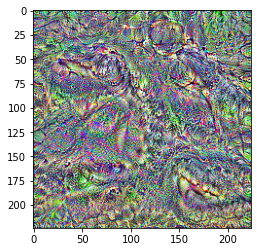

In [ ]:
optimize_img(SigmoidImage(), 300, True, 0.05)

In [595]:
class FourierImage(nn.Module):
    def __init__(self):
        super(FourierImage, self).__init__()
        HEIGHT = 224
        WIDTH = 113
        self.image_frequencies = nn.Parameter(torch.randn(1, 3, HEIGHT, WIDTH, 2, device=device))
        
        height_freqs = torch.fft.fftfreq(HEIGHT, device=device)
        width_freqs = torch.fft.fftfreq(WIDTH, device=device)
        freq_magnitudes = 1. / torch.sqrt(height_freqs[:, None] ** 2 + width_freqs[None, :] ** 2)
        freq_magnitudes[0, 0] = HEIGHT
        self.register_buffer("freq_magnitudes", freq_magnitudes)
    
    def forward(self):
        normalized_freqs = self.image_frequencies * self.freq_magnitudes.unsqueeze(-1)
        image = torch.fft.irfft2(torch.view_as_complex(normalized_freqs), norm="ortho")
        result = torch.sigmoid(image)
        return result

Iteration 0 - logit -3.586793899536133
Iteration 50 - logit 14.621971130371094
Iteration 100 - logit 31.9174861907959
Iteration 150 - logit 37.474002838134766
Iteration 200 - logit 42.26022720336914
Iteration 250 - logit 47.709007263183594
Iteration 300 - logit 50.0661735534668
Iteration 350 - logit 57.34629821777344
Iteration 400 - logit 51.510684967041016
Iteration 450 - logit 64.67071533203125


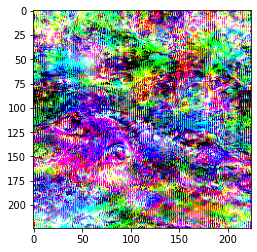

In [598]:
im = optimize_img(FourierImage(), 500, True, 0.01)

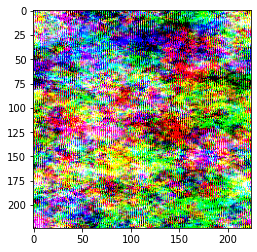

In [597]:
im = optimize_img(FourierImage(), 0, True, 0.05)

In [546]:
class DecorrelatedImage(nn.Module):
    def __init__(self, mult=1, add=0, use_sigmoid=True):
        super(DecorrelatedImage, self).__init__()
        self.image_tensor = nn.Parameter(torch.rand(1, 3, 224, 224, device=device))
        self.register_buffer("basis_transformation", torch.Tensor(
            [[0.26, 0.09, 0.02],
             [0.27, 0.00, -0.05],
             [0.27, -0.09, 0.03]]).to(device))
        self.mult = mult
        self.add = add
        self.use_sigmoid=use_sigmoid
    
    def forward(self):
        rgb_image = torch.einsum("ij,bjhw->bihw", self.basis_transformation, self.image_tensor)
        rgb_image = self.mult * rgb_image + self.add
        if self.use_sigmoid:
            result = torch.sigmoid(rgb_image)
        else:
            return torch.clip(rgb_image, 0, 1)
        return result

Iteration 0 - logit -1.4533700942993164
Iteration 20 - logit 20.206714630126953
Iteration 40 - logit 42.0332145690918
Iteration 60 - logit 52.28120422363281
Iteration 80 - logit 63.76237106323242
Iteration 100 - logit 64.59685516357422
Iteration 120 - logit 67.03828430175781
Iteration 140 - logit 75.75216674804688
Iteration 160 - logit 68.34140014648438
Iteration 180 - logit 78.74152374267578


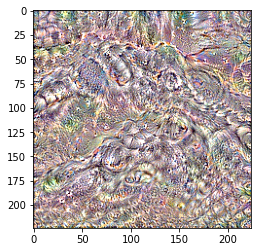

In [549]:
im = optimize_img(DecorrelatedImage(add=0.5, use_sigmoid=False), 200, True, 0.05)

In [599]:
class FourierDecorrelatedImage(nn.Module):
    def __init__(self, scale=1, add=0, norm="ortho", use_sigmoid=True):
        super(FourierDecorrelatedImage, self).__init__()
        self.image_frequencies = nn.Parameter(torch.randn(1, 3, 224, 113, 2, device=device))
        
        height_freqs = torch.fft.fftfreq(224)
        width_freqs = torch.fft.fftfreq(113)
        freq_magnitudes = torch.sqrt(height_freqs[:, None] ** 2 + width_freqs[None, :] ** 2)
        freq_magnitudes[0, 0] = 1. / 224
        self.register_buffer("freq_magnitudes", freq_magnitudes.to(device))
        self.register_buffer("basis_transformation", torch.Tensor(
            [[0.26, 0.09, 0.02],
             [0.27, 0.00, -0.05],
             [0.27, -0.09, 0.03]]).to(device))
        self.scale = scale
        self.add = add
        self.norm = norm
        self.use_sigmoid = use_sigmoid
    
    def forward(self):
        normalized_freqs = self.image_frequencies / self.freq_magnitudes.unsqueeze(-1)
        image = torch.fft.irfft2(torch.view_as_complex(normalized_freqs), norm=self.norm)
        rgb_image = torch.einsum("ij,bjhw->bihw", self.basis_transformation, image)
        if self.use_sigmoid:
            return torch.sigmoid(self.scale * rgb_image + self.add)
        else:
            return torch.clip(self.scale * rgb_image + self.add, 0, 1)

Iteration 0 - logit -3.3187105655670166
Iteration 10 - logit 0.21184828877449036
Iteration 20 - logit 0.988149881362915
Iteration 30 - logit 4.419500827789307
Iteration 40 - logit 6.30792760848999
Iteration 50 - logit 9.608144760131836
Iteration 60 - logit 12.027200698852539
Iteration 70 - logit 30.620988845825195
Iteration 80 - logit 28.08694076538086
Iteration 90 - logit 36.149314880371094


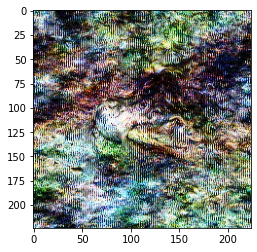

In [600]:
#im = optimize_img(FourierDecorrelatedImage(scale=20, add=0.5, norm="backward", use_sigmoid=True), 0, True, 0.01)
im = optimize_img(FourierDecorrelatedImage(scale=1), 100, True, 0.01)

In [601]:
# FORWARD HOOKS
# def printnorm(self, input, output):
#     # input is a tuple of packed inputs
#     # output is a Tensor. output.data is the Tensor we are interested
#     print('Inside ' + self.__class__.__name__ + ' forward')
#     print('')
#     print('input: ', type(input))
#     print('input[0]: ', type(input[0]))
#     print('output: ', type(output))
#     print('')
#     print('input size:', input[0].size())
#     print('output size:', output.data.size())
#     print('output norm:', output.data.norm())


# net.conv2.register_forward_hook(printnorm)

# out = net(input)



model = torchvision.models.resnet34(pretrained=True).to(device)
for name, layer in model.named_modules():
    #print("Named module:", key, val)
    if (name.endswith("relu")):
        #print(name, layer)
        # register a hook on layer
        pass

In [644]:
def imsave(img, filename):
    if len(img.shape) == 4:
        img = img.squeeze()
    if img.shape[0] == 3:
        img = einops.rearrange(img, "c h w -> h w c")
    plt.imsave(filename, img)
    
def make_relu_hook(arr):
    def relu_hook(module, module_inputs, module_outputs):
        # input is a tuple of packed inputs
        # output is a Tensor. output.data is the Tensor we are interested b c h w
        arr[0] = torch.einsum("bchw -> bc", module_outputs[:,:10,:,:]**2)
    return relu_hook


def make_relu_hook_save_output(arr):
    def relu_hook(module, module_inputs, module_outputs):
        # input is a tuple of packed inputs
        # output is a Tensor. output.data is the Tensor we are interested b c h w
        arr[0] = module_outputs
    return relu_hook

def get_relu_layers(model):
    return [
        model.relu,
        model.layer1[0].relu,
        model.layer1[1].relu,
        model.layer1[2].relu,
        model.layer2[0].relu,
        model.layer2[1].relu,
        model.layer2[2].relu,
        model.layer2[3].relu,
        model.layer3[0].relu,
        model.layer3[1].relu,
        model.layer3[2].relu,
        model.layer3[3].relu,
        model.layer3[4].relu,
        model.layer3[5].relu,
        model.layer4[0].relu,
        model.layer4[1].relu,
        model.layer4[2].relu,
    ]
    
def add_relu_hook(layer, output):
    removeable_handle = layer.register_forward_hook(make_relu_hook(output))
    return removeable_handle

def add_relu_hook_save_output(layer, output):
    removeable_handle = layer.register_forward_hook(make_relu_hook_save_output(output))
    return removeable_handle

def optimise_relu_channels(img_class, model, num_iters_per_channel, lr, transforms=None):
    relu_layers = get_relu_layers(model)
    for i, layer in enumerate(relu_layers):
        # if i < 11:
        #     print("skipping layer", i)
        #     continue
        arr = [None]
        hook_handle = add_relu_hook(layer, arr)
        for channel_num in range(10):
            image_module = img_class()
            optimizer = torch.optim.Adam(image_module.parameters(), lr=lr) 
            filename = f"images/layer-{i}-channel-{channel_num}.png"
            optimise_channel(channel_num, image_module, model, arr, optimizer, filename, num_iters_per_channel, transforms)  
            print("finished layer ", i, "channel ", channel_num)
        hook_handle.remove()       

def optimise_channel(channel_num, img_module, model, arr, optimizer, filename, num_iters, transforms=None):
    model.eval()
    for i in range(num_iters):
        optimizer.zero_grad()
        img = img_module()
        if transforms:
            img = transforms(img)
        out = model(img)
        loss = -arr[0][0][channel_num]
        loss.backward()
        # if i % (num_iters // 10) == 0:
        #     print("Iteration", i, "- loss", loss.item())
        optimizer.step()
    with torch.no_grad():
        im = img_module()
        imsave(im.detach().to("cpu").numpy(), filename)
    

In [612]:
model = torchvision.models.resnet34(pretrained=True).to(device)
optimise_relu_channels(lambda : FourierDecorrelatedImage(scale=1), model, 500, 0.01, transforms=transforms)

finished layer  0 channel  0
finished layer  0 channel  1
finished layer  0 channel  2
finished layer  0 channel  3
finished layer  0 channel  4
finished layer  0 channel  5
finished layer  0 channel  6
finished layer  0 channel  7
finished layer  0 channel  8
finished layer  0 channel  9
finished layer  1 channel  0
finished layer  1 channel  1
finished layer  1 channel  2
finished layer  1 channel  3
finished layer  1 channel  4
finished layer  1 channel  5
finished layer  1 channel  6
finished layer  1 channel  7
finished layer  1 channel  8
finished layer  1 channel  9
finished layer  2 channel  0
finished layer  2 channel  1
finished layer  2 channel  2
finished layer  2 channel  3
finished layer  2 channel  4
finished layer  2 channel  5
finished layer  2 channel  6
finished layer  2 channel  7
finished layer  2 channel  8
finished layer  2 channel  9
finished layer  3 channel  0
finished layer  3 channel  1
finished layer  3 channel  2
finished layer  3 channel  3
finished layer

Iteration 0 - activation 338.3870544433594
Iteration 100 - activation 12985.951171875
Iteration 200 - activation 29816.046875
Iteration 300 - activation 43934.18359375
Iteration 400 - activation 64684.9609375
Iteration 500 - activation 60287.0546875
Iteration 600 - activation 84920.3359375
Iteration 700 - activation 93371.921875
Iteration 800 - activation 98109.890625
Iteration 900 - activation 108428.3828125


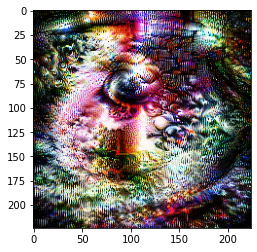

In [608]:
arr = [None]
image_module = FourierDecorrelatedImage(scale=1)
optimizer = torch.optim.Adam(image_module.parameters(), lr=0.01) 
relu_layers = get_relu_layers(model)
hook_handle = add_relu_hook(relu_layers[16], arr)
model.eval()
num_iters = 1000
use_transforms = True
for i in range(num_iters):
    optimizer.zero_grad()
    img = image_module()
    if use_transforms:
        img = transforms(img)
    out = model(img)
    loss = -arr[0][0][7]
    loss.backward()
    if i % (num_iters // 10) == 0:
        print("Iteration", i, "- activation", -loss.item())
    optimizer.step()
with torch.no_grad():
    im = image_module()
    imshow(im.detach().to("cpu").numpy())

In [605]:
from PIL import Image
import torchvision.transforms

def load_image(fname):
    img = Image.open(fname)
    tensorize = torchvision.transforms.ToTensor()
    img = tensorize(img)
    return torchvision.transforms.functional.resize(img, [224, 224]).unsqueeze(0)
    

torch.Size([64, 56, 56])


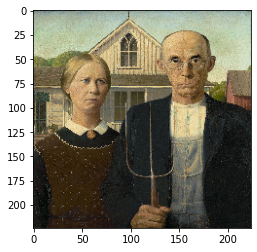

In [606]:
photo = load_image("gothic.jpg").to(device)

model = torchvision.models.resnet34(pretrained=True).to(device)
def get_activations(model, image):
    relu_layers = get_relu_layers(model)
    arr = [[None] for _ in relu_layers]
    hook_handles = []
    for i, layer in enumerate(relu_layers):
        hook_handle = add_relu_hook_save_output(layer, arr[i])
        hook_handles.append(hook_handle)
    model.eval()
    model(image)
    for handle in hook_handles:
        handle.remove()
    return arr

goal_activations = get_activations(model, photo)
print(goal_activations[1][0].squeeze().shape)
imshow(photo.to("cpu"))

Iteration 0 loss 93325.078125
Iteration 50 loss 78637.609375
Iteration 100 loss 72478.4921875
Iteration 150 loss 66866.1484375
Iteration 200 loss 58527.96875
Iteration 250 loss 53074.234375
Iteration 300 loss 47823.65625
Iteration 350 loss 51229.890625
Iteration 400 loss 41407.578125
Iteration 450 loss 36595.953125


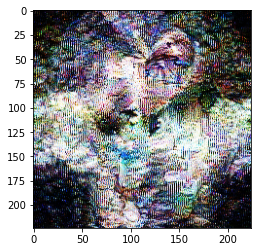

In [609]:
transforms = nn.Sequential(
    torchvision.transforms.RandomAffine(10, translate=(0.1,0.1)),
    torchvision.transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)
)
model = torchvision.models.resnet34(pretrained=True).to(device)
layer_num = 16
arr = [None]
image_module = FourierDecorrelatedImage(scale=1)
optimizer = torch.optim.Adam(image_module.parameters(), lr=0.01) 
relu_layers = get_relu_layers(model)
hook_handle = add_relu_hook_save_output(relu_layers[layer_num], arr)
model.eval()
num_iters = 500
for i in range(num_iters):
    optimizer.zero_grad()
    img = image_module()
    img = transforms(img)
    out = model(img)
    loss = torch.sum((arr[0][0][:] -goal_activations[layer_num][0].squeeze(0).detach()[:]) ** 2)
    loss.backward()
    if i % (num_iters // 10) == 0:
        print("Iteration", i, "loss", loss.item())
    optimizer.step()
with torch.no_grad():
    im = image_module()
    imshow(im.detach().to("cpu").numpy())

Iteration 0 activation 66572.640625
Iteration 50 activation 434057.125
Iteration 100 activation 1249279.0
Iteration 150 activation 2671293.25
Iteration 200 activation 4784765.0
Iteration 250 activation 7626586.0
Iteration 300 activation 11203864.0
Iteration 350 activation 15508688.0
Iteration 400 activation 20533542.0
Iteration 450 activation 26273348.0
tensor([152723.7344, 136365.1875, 155237.7344, 149924.0625, 140902.5000,
        119857.8906, 139072.1250, 149928.7031, 102403.2812, 137994.1875,
        131121.1562, 142604.5781, 127852.1094, 149884.6406, 122365.5625,
         95299.3516, 114548.7734, 129010.4609, 153226.2500, 140276.4375,
        152661.1562, 150525.8125, 121283.7188, 151709.0625, 125355.3672,
        137780.5781, 148183.2812, 163859.5938, 163306.9531, 106835.2422,
        146160.1719, 153797.0625, 121941.7500, 158350.5625, 153063.4531,
        125156.5703, 130852.7422, 150092.9531, 132941.5625, 162374.5000,
        152898.0312, 106417.0156, 149866.0000, 155559.4062, 

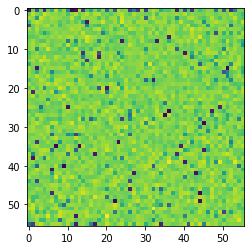

In [682]:
def make_relu_hook_layer_mag(arr):
    def relu_hook(module, module_inputs, module_outputs):
        # input is a tuple of packed inputs
        # output is a Tensor. output.data is the Tensor we are interested b c h w
        arr[0] = torch.sum(module_outputs[:,:,:,:]**2)
    return relu_hook

def add_relu_hook_layer_mag(layer, output):
    removeable_handle = layer.register_forward_hook(make_relu_hook_layer_mag(output))
    return removeable_handle

inp = torch.randn(1, 64, 56, 56, requires_grad=True, device=device)
inp.retain_grad()
model = torchvision.models.resnet34(pretrained=True).to(device)
modules = list(model.children())[4:-1]
newnet = nn.Sequential(*modules)
newnet.eval()


relu_layers = []
for name, module in newnet.named_modules():
    if "relu" in name:
        relu_layers.append(module)

arr = [None]
hook_handle = add_relu_hook_layer_mag(relu_layers[5], arr)

optimizer = torch.optim.Adam([inp], lr=0.01) 

NUM_ITER = 500

for i in range(NUM_ITER):
    optimizer.zero_grad()
    newnet(inp)
    loss = -arr[0]
    loss.backward()
    optimizer.step()
    if i % (NUM_ITER // 10) == 0:
        print("Iteration", i, "activation", -loss.item())
    
opt_inp = inp.squeeze().detach().to("cpu")
channel_activations = torch.sum(opt_inp**2, dim=[1,2])
print(channel_activations)
print("Most active channel ", torch.argmax(channel_activations))
imshow(opt_inp[46,:,:])